**1. Подключение библиотек**


## Лабораторная работа 7: Разработка единого шаблона предварительной обработки данных
Суть: Создание пайплайна для подготовки данных перед анализом, включающего очистку, нормализацию, заполнение пропусков и кодирование категориальных переменных.

Масштабирование данных: Приведение всех признаков к одному масштабу, чтобы они имели одинаковое влияние (например, нормализация от 0 до 1).

Однолинейное кодирование (one-hot encoding): Преобразование категориальных переменных в бинарные столбцы (например, "красный, зеленый, синий" → [1,0,0], [0,1,0], [0,0,1]).

Удаление выбросов: Устранение аномальных значений, которые могут искажать анализ.

Заполнение пропусков: Замена отсутствующих значений в данных на среднее, медиану или предсказанные значения.

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns

**2. Загрузка данных**

In [ ]:
uploaded = files.upload()

Saving Marine_Fish_Data.csv to Marine_Fish_Data.csv


In [ ]:
# Загрузка данных из файла
dataset = pd.read_csv('Marine_Fish_Data.csv')

# Просмотр первых строк
print(dataset.head())

# Проверка на наличие пропущенных значений
print("\nКоличество пропущенных значений:\n", dataset.isnull().sum())

  Species_Name             Region Breeding_Season Fishing_Method  \
0       Salmon     North Atlantic          Summer            Net   
1         Tuna      Pacific Ocean         Monsoon           Line   
2          Cod  Mediterranean Sea          Summer           Line   
3      Herring      Pacific Ocean         Monsoon          Trawl   
4      Herring       Indian Ocean         Monsoon          Trawl   

   Fish_Population  Average_Size(cm) Overfishing_Risk  Water_Temperature(C)  \
0             8270             71.92               No                 24.68   
1             1860             85.33               No                 21.33   
2             6390             88.02               No                 16.98   
3             6191             85.46              Yes                 28.51   
4             6734             48.35              Yes                 25.37   

  Water_Pollution_Level  
0                  High  
1                  High  
2                Medium  
3           

**3. Разделение на признаки и целевую переменную**

In [ ]:
# Установить точность вывода для NumPy и выключить экспоненциальную нотацию
np.set_printoptions(precision=4, suppress=True)

# Разделение на матрицу признаков X и зависимую переменную y
# iloc - это метод для индексации по числовым позициям (индексы строк и столбцов).
X = dataset.iloc[:, 2:].values  # Все числовые признаки начиная с третьего столбца
y = dataset.iloc[:, 1].values  # "diagnosis" - целевая переменная

# Вывод первых 5 строк матрицы признаков и зависимой переменной
print("Матрица признаков (первые 5 строк):\n", X[:5])
print("\nЗависимая переменная (первые 5 значений):\n", y[:5])


Матрица признаков (первые 5 строк):
 [['Summer' 'Net' 8270 71.92 'No' 24.68 'High']
 ['Monsoon' 'Line' 1860 85.33 'No' 21.33 'High']
 ['Summer' 'Line' 6390 88.02 'No' 16.98 'Medium']
 ['Monsoon' 'Trawl' 6191 85.46 'Yes' 28.51 'Low']
 ['Monsoon' 'Trawl' 6734 48.35 'Yes' 25.37 'Low']]

Зависимая переменная (первые 5 значений):
 ['North Atlantic' 'Pacific Ocean' 'Mediterranean Sea' 'Pacific Ocean'
 'Indian Ocean']


**4. Обработка пропущенных значений**

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# Допустим, X — это ваш DataFrame с данными
X = pd.DataFrame(X)

# Преобразуем строки в числовые значения там, где это возможно
X = X.apply(pd.to_numeric, errors='ignore')  # Пытаемся преобразовать данные в числовой формат

# Проверяем типы данных после преобразования
print("Типы данных после преобразования:\n", X.dtypes)

# Разделяем данные на числовые и категориальные столбцы
X_numeric = X.select_dtypes(include=[np.number])  # Выбираем только числовые столбцы
X_categorical = X.select_dtypes(exclude=[np.number])  # Выбираем только категориальные столбцы

# Если X_numeric не пуст, применяем SimpleImputer для числовых данных
if not X_numeric.empty:
    imputer_numeric = SimpleImputer(missing_values=np.nan, strategy='mean')
    X_numeric_imputed = imputer_numeric.fit_transform(X_numeric)
    print("Числовые данные после обработки пропущенных значений:\n", X_numeric_imputed[:5])

# Если X_categorical не пуст, применяем SimpleImputer для категориальных данных
if not X_categorical.empty:
    imputer_categorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    X_categorical_imputed = imputer_categorical.fit_transform(X_categorical)
    print("Категориальные данные после обработки пропущенных значений:\n", X_categorical_imputed[:5])

# Объединяем обработанные данные обратно в один массив
if not X_numeric.empty and not X_categorical.empty:
    X_imputed = np.concatenate([X_numeric_imputed, X_categorical_imputed], axis=1)
    print("\nМатрица признаков после обработки пропущенных значений:\n", X_imputed[:5])


Типы данных после преобразования:
 0     object
1     object
2      int64
3    float64
4     object
5    float64
6     object
dtype: object
Числовые данные после обработки пропущенных значений:
 [[8270.     71.92   24.68]
 [1860.     85.33   21.33]
 [6390.     88.02   16.98]
 [6191.     85.46   28.51]
 [6734.     48.35   25.37]]
Категориальные данные после обработки пропущенных значений:
 [['Summer' 'Net' 'No' 'High']
 ['Monsoon' 'Line' 'No' 'High']
 ['Summer' 'Line' 'No' 'Medium']
 ['Monsoon' 'Trawl' 'Yes' 'Low']
 ['Monsoon' 'Trawl' 'Yes' 'Low']]

Матрица признаков после обработки пропущенных значений:
 [[8270.0 71.92 24.68 'Summer' 'Net' 'No' 'High']
 [1860.0 85.33 21.33 'Monsoon' 'Line' 'No' 'High']
 [6390.0 88.02 16.98 'Summer' 'Line' 'No' 'Medium']
 [6191.0 85.46 28.51 'Monsoon' 'Trawl' 'Yes' 'Low']
 [6734.0 48.35 25.37 'Monsoon' 'Trawl' 'Yes' 'Low']]


<ipython-input-23-5a9de5eb0d97>:9: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors='ignore')  # Пытаемся преобразовать данные в числовой формат


**5. Обработка категориальных данных**

In [ ]:
# LabelEncoder — это класс из библиотеки sklearn.preprocessing, который используется для
# преобразования меток категориальных переменных в числовые значения
labelencoder_y = LabelEncoder() # labelencoder_y — это объект класса LabelEncoder, который будет выполнять кодирование.
print("\nЦелевая переменная до кодирования:\n", y[:50])
y = labelencoder_y.fit_transform(y)
print("\nЦелевая переменная после кодирования:\n", y[:50])


Целевая переменная до кодирования:
 ['North Atlantic' 'Pacific Ocean' 'Mediterranean Sea' 'Pacific Ocean'
 'Indian Ocean' 'Mediterranean Sea' 'Pacific Ocean' 'Pacific Ocean'
 'Mediterranean Sea' 'Pacific Ocean' 'Mediterranean Sea' 'Pacific Ocean'
 'North Atlantic' 'Mediterranean Sea' 'North Atlantic' 'North Atlantic'
 'Pacific Ocean' 'Indian Ocean' 'North Atlantic' 'North Atlantic'
 'North Atlantic' 'Indian Ocean' 'Indian Ocean' 'North Atlantic'
 'Indian Ocean' 'Indian Ocean' 'Indian Ocean' 'Mediterranean Sea'
 'North Atlantic' 'Indian Ocean' 'Mediterranean Sea' 'Pacific Ocean'
 'Pacific Ocean' 'Indian Ocean' 'North Atlantic' 'Indian Ocean'
 'Pacific Ocean' 'North Atlantic' 'North Atlantic' 'Pacific Ocean'
 'Mediterranean Sea' 'Mediterranean Sea' 'Indian Ocean' 'North Atlantic'
 'Indian Ocean' 'North Atlantic' 'Pacific Ocean' 'North Atlantic'
 'North Atlantic' 'Pacific Ocean']

Целевая переменная после кодирования:
 [2 3 1 3 0 1 3 3 1 3 1 3 2 1 2 2 3 0 2 2 2 0 0 2 0 0 0 1 2 0 1 3 3 0 

**6. Разделение на обучающую и тестовую выборки**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Для каждого столбца с типом 'object' применим LabelEncoder
label_encoders = {}
for col in X_train.columns:  # Пройдем по каждому столбцу
    if X_train[col].dtype == 'object':  # Если столбец категориальный
        le = LabelEncoder()  # Инициализируем LabelEncoder
        X_train[col] = le.fit_transform(X_train[col])  # Преобразуем категорию в числа
        label_encoders[col] = le  # Сохраняем энкодер для дальнейшего использования

# Теперь все столбцы должны быть числовыми
print("Типы данных в X_train после кодирования:")
print(X_train.dtypes)


Типы данных в X_train после кодирования:
0      int64
1      int64
2      int64
3    float64
4      int64
5    float64
6      int64
dtype: object


In [ ]:
from sklearn.impute import SimpleImputer

# Создаем SimpleImputer для замены пропущенных значений на среднее
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

# Проверяем, нет ли пропущенных значений
print("Количество пропущенных значений в X_train:")
print(pd.isnull(X_train).sum())


Количество пропущенных значений в X_train:
0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Модель для классификации
model = RandomForestClassifier(random_state=42)

# Кросс-валидация на обучающей выборке
skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

# Выполнение кросс-валидации
cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')

print("\nКросс-валидация на обучающей выборке:")
print(f"Скорости на каждом фолде: {cv_scores}")
print(f"Средняя точность: {cv_scores.mean():.4f}")
print(f"Стандартное отклонение: {cv_scores.std():.4f}")



Кросс-валидация на обучающей выборке:
Скорости на каждом фолде: [0.2239 0.3582 0.209  0.209  0.2576 0.2424]
Средняя точность: 0.2500
Стандартное отклонение: 0.0514


**7. Визуализация данных**

Гистограмма распределения целевой переменной

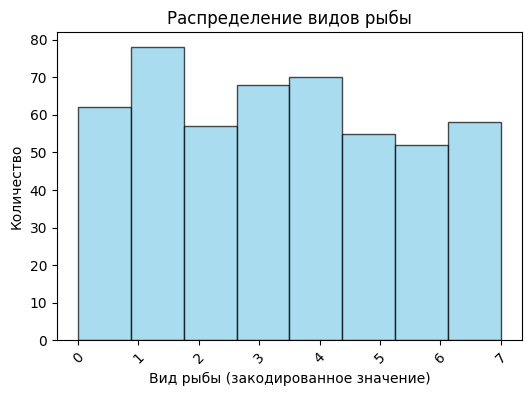

In [ ]:
import matplotlib.pyplot as plt

# Преобразуем 'Species_Name' в категориальные данные и затем в числовые значения
dataset['Species_Name'] = dataset['Species_Name'].astype('category').cat.codes

# Визуализация распределения значений целевой переменной
plt.figure(figsize=(6, 4))
plt.hist(dataset['Species_Name'], bins=len(dataset['Species_Name'].unique()), color='skyblue', edgecolor='black', alpha=0.7)

# Настройка заголовков и подписей
plt.title("Распределение видов рыбы")
plt.xlabel("Вид рыбы (закодированное значение)")
plt.ylabel("Количество")
plt.xticks(range(len(dataset['Species_Name'].unique())), dataset['Species_Name'].astype('category').cat.categories, rotation=45)  # Подписи для оси X
plt.show()



<ipython-input-38-4e71c0219d22>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Overfishing_Risk', y='Average_Size(cm)', data=dataset, palette="Set2")


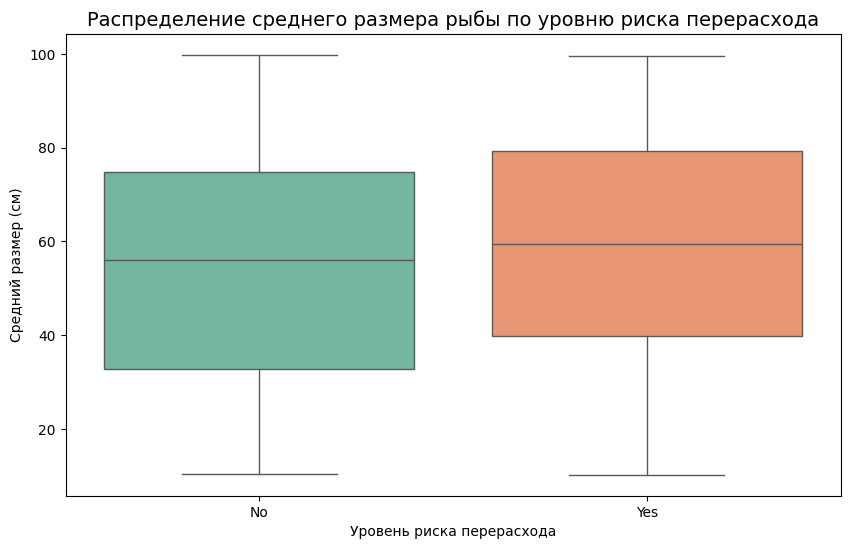

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Визуализация: Box plot для 'Overfishing_Risk' vs. 'Average_Size(cm)'
plt.figure(figsize=(10, 6))

# Строим диаграмму размаха, где на оси X будет 'Overfishing_Risk' (уровень риска перерасхода рыбы),
# а на оси Y будет 'Average_Size(cm)' (средний размер рыбы).
sns.boxplot(x='Overfishing_Risk', y='Average_Size(cm)', data=dataset, palette="Set2")

# Настройка заголовка и подписей
plt.title("Распределение среднего размера рыбы по уровню риска перерасхода", fontsize=14)
plt.xlabel("Уровень риска перерасхода")
plt.ylabel("Средний размер (см)")
plt.show()


Матрица корреляции

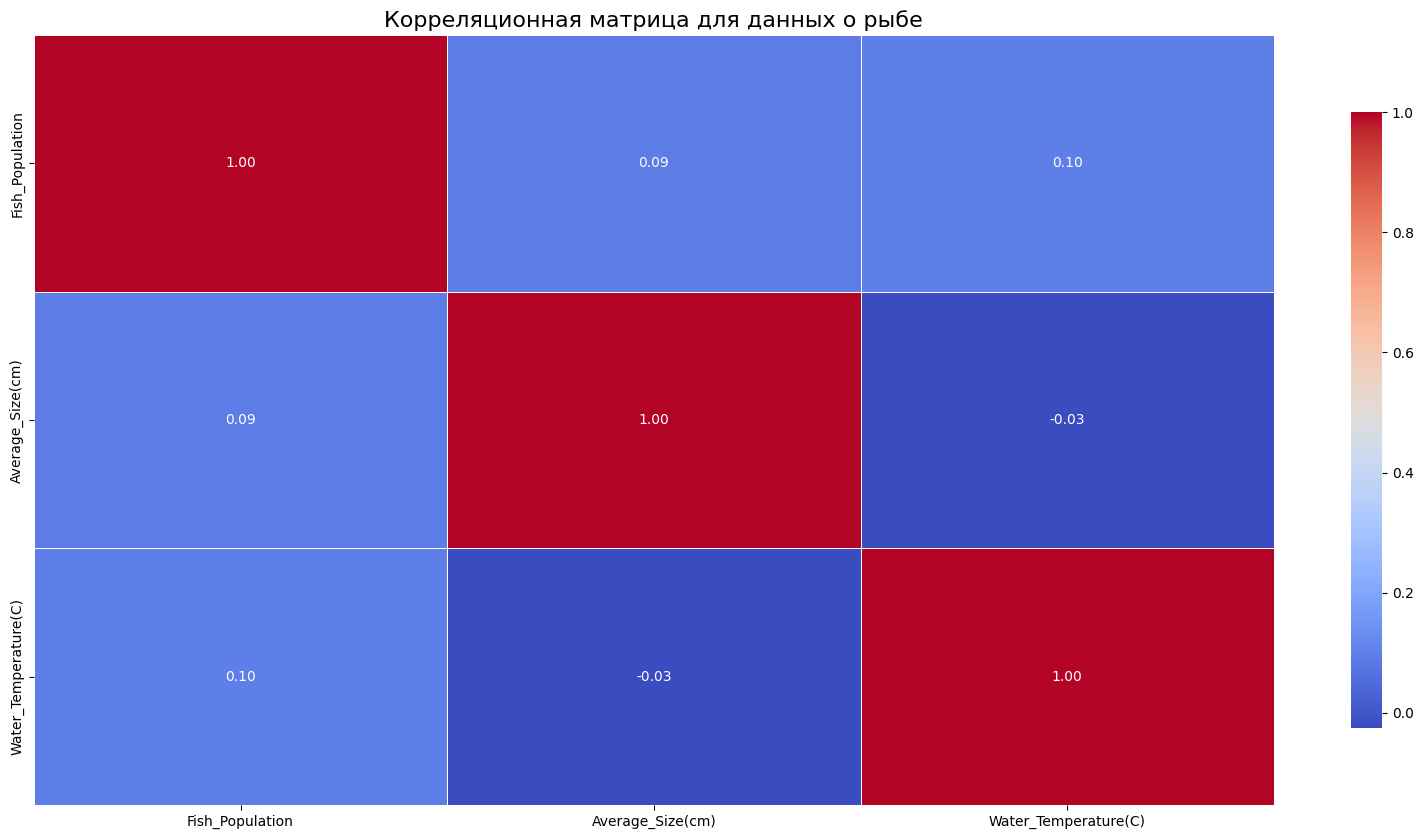

In [ ]:
# Извлекаем только числовые столбцы для корреляции
numeric_columns = dataset.select_dtypes(include=[float, int]).columns

# Строим корреляционную матрицу для числовых признаков
correlation_matrix = dataset[numeric_columns].corr()

# Настроим размерность графика
plt.figure(figsize=(20, 10))

# Строим тепловую карту с числовыми значениями внутри ячеек
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})

# Добавим заголовок
plt.title("Корреляционная матрица для данных о рыбе", fontsize=16)

# Покажем график
plt.show()


<ipython-input-43-1afd493316e0>:20: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=X_train_df[feature_1], y=X_train_df[feature_2], hue=diagnosis, style=diagnosis,


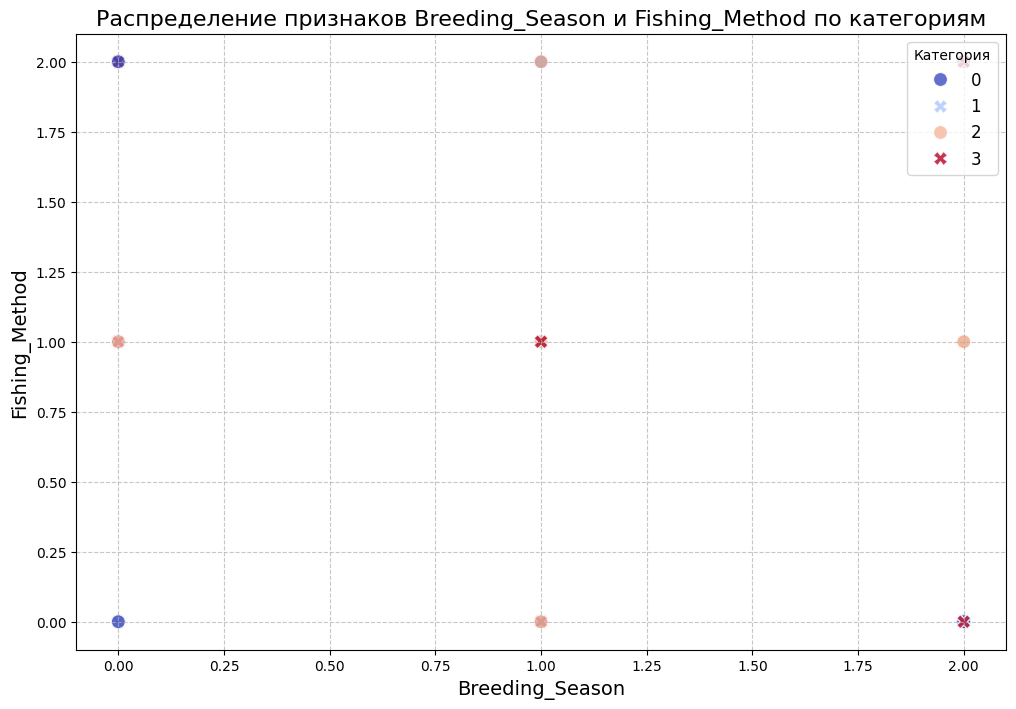

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Задаем названия столбцов на основе исходного DataFrame
feature_names = dataset.columns[2:]  # Предположим, признаки начинаются с третьего столбца

# Преобразуем массив признаков X_train обратно в DataFrame с исходными названиями
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Выбор признаков для визуализации
feature_1 = feature_names[0]  # Признак 'Fish_Population' или другой по индексу
feature_2 = feature_names[1]  # Признак 'Average_Size(cm)' или другой по индексу
diagnosis = y_train  # Целевая переменная (например, 'Overfishing_Risk')

# Построение диаграммы рассеяния с улучшенной визуализацией
plt.figure(figsize=(12, 8))

# Используем разные маркеры для разных категорий и более контрастную палитру
sns.scatterplot(x=X_train_df[feature_1], y=X_train_df[feature_2], hue=diagnosis, style=diagnosis,
                palette="coolwarm", s=100, alpha=0.8, markers=["o", "X"])

# Добавляем заголовок и подписи к осям
plt.title(f"Распределение признаков {feature_1} и {feature_2} по категориям", fontsize=16)
plt.xlabel(feature_1, fontsize=14)
plt.ylabel(feature_2, fontsize=14)

# Настройка легенды
plt.legend(title="Категория", fontsize=12, loc='upper right')

# Улучшаем отображение графика
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
